# ARIMA Model for Forecasting

A popular and widely used statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of di↵erent standard temporal structures in time series data.

## Autoregressive Integrated Moving Average Model

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model. A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model. Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12,9)

Populating the interactive namespace from numpy and matplotlib


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


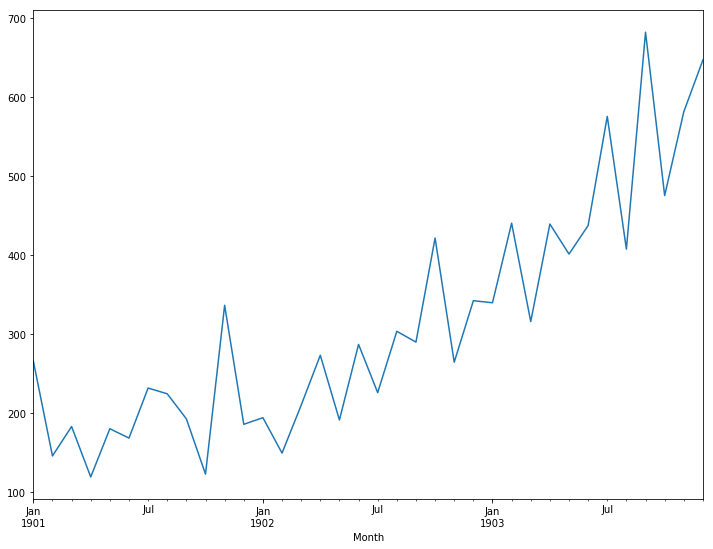

In [6]:
#Load and plot data
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

#load dataset
def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
series = series[:-1]
#summarize first few rows
print(series.head())

#lineplot
series.plot()
pyplot.show()

Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1. Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas.

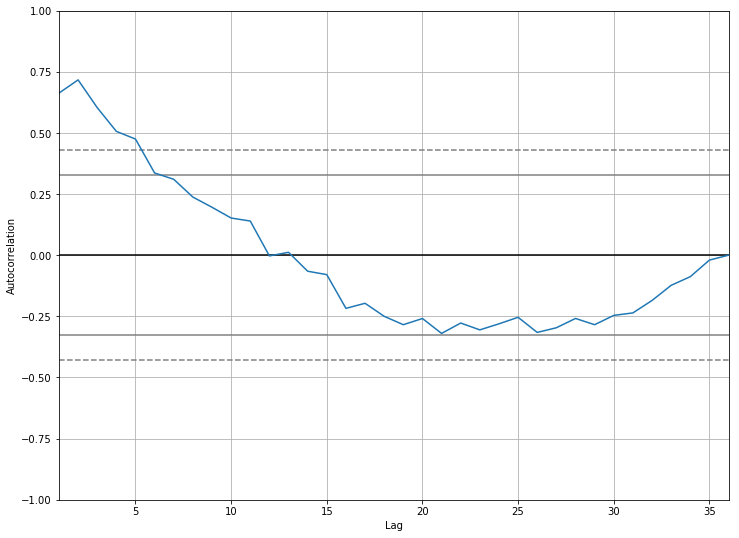

In [7]:
#Load and plot data
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

#load dataset
def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
series = series[:-1]

#autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

We can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags. A good starting point for the AR parameter of the model may be 5.

## ARIMA with Python 

The Statsmodels library provides the capability to fit an ARIMA model. An ARIMA model can be created using the Statsmodels library as follows:
1. Define the model by calling ARIMA() and passing in the p, d, and q parameters. 
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

Fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors. First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0. When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [12]:
# Fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

#load dataset
def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)
series = series[:-1]

#fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

#summary of fit model
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 25 May 2017   AIC                            406.340
Time:                                                 17:06:10   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------

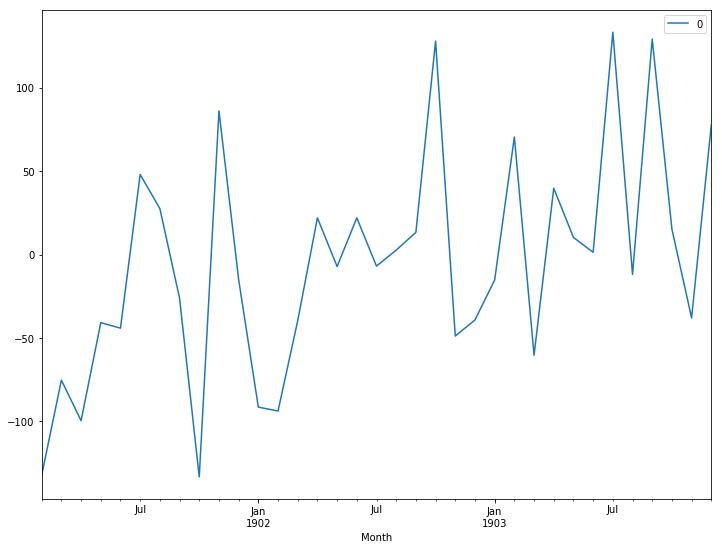

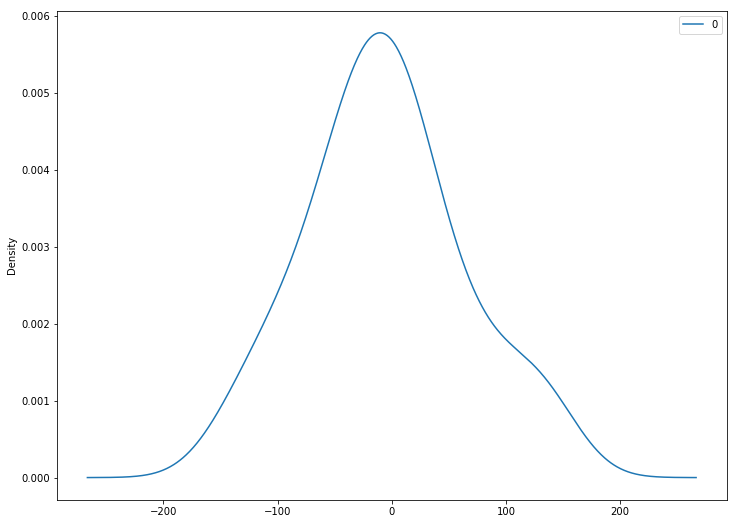

                0
count   35.000000
mean    -5.495253
std     68.132879
min   -133.296645
25%    -42.477921
50%     -7.186628
75%     24.748305
max    133.237946


In [14]:
#line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

#density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

#summary stats of residuals
print(residuals.describe())